##### Loading libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.cluster import KMeans
import matplotlib._color_data as mcd
from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, robust_scale
plt.style.use('ggplot')

### KMeans

**Parameters:**


1.   n_clusters
2.   max_iter
3.   n_init



##### **Data preparation**

Three clusters will be generated with median 5, 20, 6 and standard deviation equalled to 1, 5, and 0.4, respectively

In [ ]:
mean1, mean2, mean3a, mean3b = 5, 10, 1, 6
sigma1, sigma2, sigma3a, sigma3b = 1, 2, 0.8, 0.4
n = 1000
np.random.seed(42)
x1 = np.random.normal(mean1, sigma1, n)
y1 = np.random.normal(mean1, sigma1, n)
x2 = np.random.normal(mean2, sigma2, n)
y2 = np.random.normal(mean2, sigma2, n)
x3 = np.random.normal(mean3a, sigma3a, n)
y3 = np.random.normal(mean3b, sigma3b, n)

In [ ]:
xy4, correct_cluster = datasets.make_circles(n_samples=n*2, factor=0.5, noise=0.05)

In [ ]:
def add_15(arr):
    return arr+15

def add_4(arr):
    return arr+4

In [ ]:
df_circles = pd.DataFrame(list(zip(xy4, correct_cluster)), columns=['x_y','group'])
df_circles[['X', 'Y']] = pd.DataFrame(df_circles.x_y.tolist(), index= df_circles.index)
df_circles[['X']], df_circles[['Y']] = df_circles[['X']].apply(add_15), df_circles[['Y']].apply(add_4)
df_circles.drop('x_y', axis=1, inplace=True)

df_circles0 = df_circles[df_circles['group'] == 0]
df_circles1 = df_circles[df_circles['group'] == 1]

In [ ]:
df1 = pd.DataFrame(list(zip(x1, y1)), columns=['X','Y'])
df1['group'] = 0
df2 = pd.DataFrame(list(zip(x2, y2)), columns=['X','Y'])
df2['group'] = 1
df3 = pd.DataFrame(list(zip(x3, y3)), columns=['X','Y'])
df3['group'] = 2
df_circles0['group'] = 3
df_circles1['group'] = 4
df = df1.append([df2, df3, df_circles0, df_circles1])
df = df.reset_index(drop=True)
df.groupby('group').count()

<ipython-input-236-79bd06af91fe>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_circles0['group'] = 3
<ipython-input-236-79bd06af91fe>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_circles1['group'] = 4


,X,Y
group,,
0,1000,1000
1,1000,1000
2,1000,1000
3,1000,1000
4,1000,1000


Let's visualize generated data. <br>
There are three clusters (and the lower once will be difficult to separate from one another)

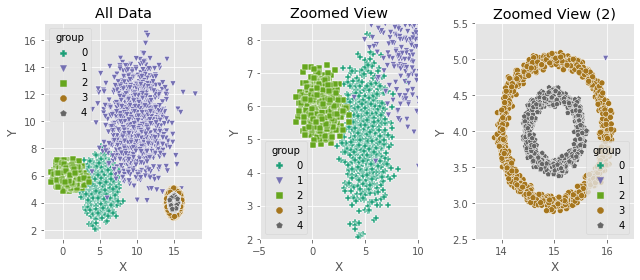

In [ ]:
cmap = mpl.colormaps['Dark2']
temp_df = df.copy(deep=True)
fig, ax = plt.subplots(1,3, figsize=(9, 4), tight_layout=True)
ax = ax.flatten()
ax[0] = sns.scatterplot(data=temp_df, x='X', y='Y', hue='group', palette=cmap, style='group', markers=['P', 'v', 's', 'o', 'p'], ax=ax[0])
ax[0].set_title('All Data')
ax[1] = sns.scatterplot(data=temp_df, x='X', y='Y', hue='group', palette=cmap, style='group', markers=['P', 'v', 's', 'o', 'p'], ax=ax[1])
ax[1].set_xlim([-5,10])
ax[1].set_ylim([2,8.5])
ax[1].set_title('Zoomed View')

ax[2] = sns.scatterplot(data=temp_df, x='X', y='Y', hue='group', palette=cmap, style='group', markers=['P', 'v', 's', 'o', 'p'], ax=ax[2])
ax[2].set_xlim([13.5,16.5])
ax[2].set_ylim([2.5,5.5])
ax[2].set_title('Zoomed View (2)')
plt.show()

##### **Standardize features!**
Features are more or less standard normally distributed data: Gaussian with zero mean and unit variance <br>
**z = (x - u) / s** <br>
where u - mean value of the feature (or 0 if with_mean=False), s - standard deviation of the feature (or 1 if with_std=False)

![img](https://miro.medium.com/max/1012/1*PM2Fgh4bm6RB0sNgxsjalw.jpeg)

In [ ]:
temp_df = df.copy(deep=True)
scl = StandardScaler()
temp_arr = (temp_df.loc[:, temp_df.columns != 'group']).values
dfnorm = scl.fit_transform(temp_arr)
dfnorm = pd.DataFrame(dfnorm, columns=['X', 'Y'])

In [ ]:
# dfnorm = dfnorm.append([df_circles0.loc[:, df_circles0.columns != 'group'], df_circles1.loc[:, df_circles1.columns != 'group']])

In [ ]:
# dfnorm.reset_index(inplace=True, drop=True)

In [ ]:
sse = []
silhouette = []
K = range(2, 15)
for k in (K):
    kmeanModel = KMeans(n_clusters=k, init='random', max_iter=300)
    kmeanModel.fit(X_train)
    sse.append(kmeanModel.inertia_)
    silhouette.append(silhouette_score(X_train, kmeanModel.labels_, metric='euclidean'))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(sse, 'b-')
ax2.plot(silhouette, 'r-')

ax1.set_xlabel('clusters')
ax1.set_ylabel('SSE', color='b')
ax2.set_ylabel('Silhouette', color='r')

plt.show()

In [ ]:
dfnorm[['X_norm', 'Y_norm']]

In [ ]:
km = KMeans(n_clusters=5, random_state=42).fit(dfnorm)
dfnorm['pred'] = km.labels_
dfnorm = dfnorm.merge(temp_df, left_index=True, right_index=True)
dfnorm.columns= ['X_norm','Y_norm', 'pred', 'X', 'Y', 'group']

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


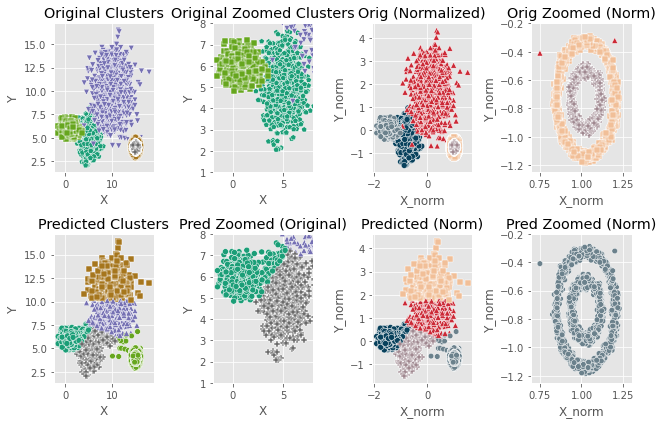

In [ ]:
palette = ['#08415C', '#CC2936', '#6B818C', '#F1BF98', '#9D858D']
palette1 = ['#9D858D', '#BBA0B2', '#A4A8D1', '#A4BFEB']

fig, ax = plt.subplots(2, 4, figsize=(9, 6), tight_layout=True)
ax = ax.flatten()
ax[0] = sns.scatterplot(data=dfnorm, x='X', y='Y', hue='group', palette=cmap, style='group', markers=['p', 'v', 's', 'o', 'P'], ax=ax[0])
ax[1] = sns.scatterplot(data=dfnorm, x='X', y='Y', hue='group', palette=cmap, style='group', markers=['p', 'v', 's', 'o', 'P'], ax=ax[1])
ax[2] = sns.scatterplot(data=dfnorm, x='X_norm', y='Y_norm', hue='group', palette=palette, style='group', markers=['o', '^', '8', 's', 'P'], ax=ax[2])
ax[3] = sns.scatterplot(data=dfnorm, x='X_norm', y='Y_norm', hue='group', palette=palette, style='group', markers=['o', '^', '8', 's', 'P'], ax=ax[3])
ax[4] = sns.scatterplot(data=dfnorm, x='X', y='Y', hue='pred', palette=cmap, style='pred', markers=['o', '^', '8', 's', 'P'], ax=ax[4])
ax[5] = sns.scatterplot(data=dfnorm, x='X', y='Y', hue='pred', palette=cmap, style='pred', markers=['o', '^', '8', 's', 'P'], ax=ax[5])
ax[6] = sns.scatterplot(data=dfnorm, x='X_norm', y='Y_norm', hue='pred', palette=palette, style='pred', markers=['o', '^', '8', 's', 'P'], ax=ax[6])
ax[7] = sns.scatterplot(data=dfnorm, x='X_norm', y='Y_norm', hue='pred', palette=palette, style='pred', markers=['o', '^', '8', 's', 'P'], ax=ax[7])

ax[1].set_xlim([-2,8])
ax[1].set_ylim([1,8])
ax[3].set_xlim([0.7,1.3])
ax[3].set_ylim([-1.25,-0.2])
ax[5].set_xlim([-2,8])
ax[5].set_ylim([1,8])
ax[7].set_xlim([0.7,1.3])
ax[7].set_ylim([-1.25,-0.2])
titles = ['Original Clusters', 'Original Zoomed Clusters', 'Orig (Normalized)', 'Orig Zoomed (Norm)', \
          'Predicted Clusters', 'Pred Zoomed (Original)', 'Predicted (Norm)', 'Pred Zoomed (Norm)']

for ind in range(8):
    ax[ind].set_title(titles[ind])
    ax[ind].get_legend().remove()

plt.show()

##### **Clusterisation**

1. **First attempt of clusterisation** (w/o any additional parameters, just number of clusters)

In [ ]:
temp_df = dfnorm.copy(deep=True)
km = KMeans(n_clusters=5, random_state=42).fit(temp_df.loc[:, ['X_norm', 'Y_norm']])
km.cluster_centers_
temp_df['prediction'] = km.labels_

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


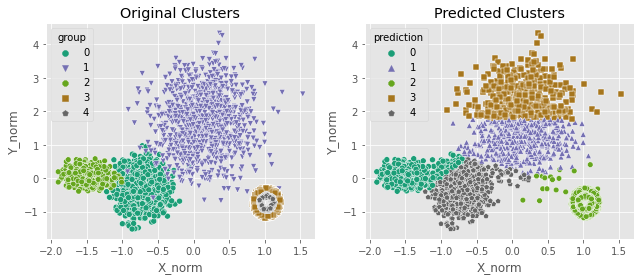

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(9, 4), tight_layout=True)
ax = ax.flatten()
ax[0] = sns.scatterplot(data=temp_df, x='X_norm', y='Y_norm', hue='group', palette=cmap, style='group', markers=['o', 'v', '8', 's', 'p'], ax=ax[0])
ax[1] = sns.scatterplot(data=temp_df, x='X_norm', y='Y_norm', hue='prediction', palette=cmap, style='prediction', markers=['o', '^', '8', 's', 'p'], ax=ax[1])
ax[0].set_title('Original Clusters')
ax[1].set_title('Predicted Clusters')
plt.show()

Wrong cluster was splitted, we have to separate the lower clusters.

2. Second attempt of clusterisation. **Let's add two features:** `max_iter` & `n_init`. <br>
We'll increase both `n_init` (in order to find lower clusters) and `max_iter`
**Note:** `max_iter` (default=300).  There are `n_init` runs in general and each run iterates `max_iter` times, i.e., within a run, points will be assigned to different clusters and the loss calculated for max_iter times. If you keep max_iter at a higher value, then you are guaranteed that you have explored the entire feature space, but often this comes at the cost of diminishing returns. <br>

`n_init` (default=10) and so the algorithm will initialize the centroids 10 times and will pick the most converging value as the best fit. Increase this value to scan the entire feature space. Note if we provide the centroids, then the algorithm will only run once; in fact it will warn us about this at run time.


In [ ]:
temp_df = dfnorm.copy(deep=True)
km = KMeans(n_clusters=5, max_iter=1000, n_init=15, random_state=42).fit(dfnorm.loc[:, ['X_norm', 'Y_norm']])
temp_df['pred'] = km.labels_

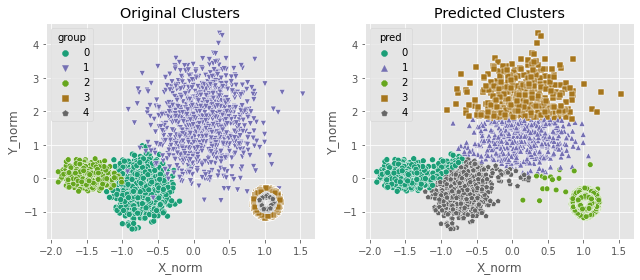

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(9, 4), tight_layout=True)
ax = ax.flatten()
ax[0] = sns.scatterplot(data=temp_df, x='X_norm', y='Y_norm', hue='group', palette=cmap, style='group', markers=['o', 'v', '8', 's', 'p'], ax=ax[0])
ax[1] = sns.scatterplot(data=temp_df, x='X_norm', y='Y_norm', hue='pred', palette=cmap, style='pred', markers=['o', '^', '8', 's', 'p'], ax=ax[1])
ax[0].set_title('Original Clusters')
ax[1].set_title('Predicted Clusters')
plt.show()

Still not working, let's try something else

![img](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRfa0syJbpFiN2up9oY23f4J0is-ISeEGR6kiko1B2l_Y_-1BtMR4aVZoJs3MpzW95Hxyo&usqp=CAU)

##### If you know **approximate location of centroids**, set it in `init` parameter (be aware that n_init will be set to 1)

In [ ]:
df_centr = df1.append([df2, df3, df_circles0, df_circles1])
df_centr = df.reset_index(drop=True)
 #df_centr.groupby('group').count()

In [ ]:
mean1

5

In [ ]:
centroids = np.asarray([[-0.8,-0.9], [0.3,1.8], [-1.5,0], [1,-0.8], [1,-0.7]]) #mean1, mean2, mean3a, mean3b
dftmp = temp_df.copy(deep=True)
dftmp = dftmp[['X_norm', 'Y_norm', 'group']]
km = KMeans(n_clusters=5, init=centroids, random_state=42).fit(dftmp.loc[:, dftmp.columns != 'group'])
km.cluster_centers_
dftmp['pred'] = km.labels_

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


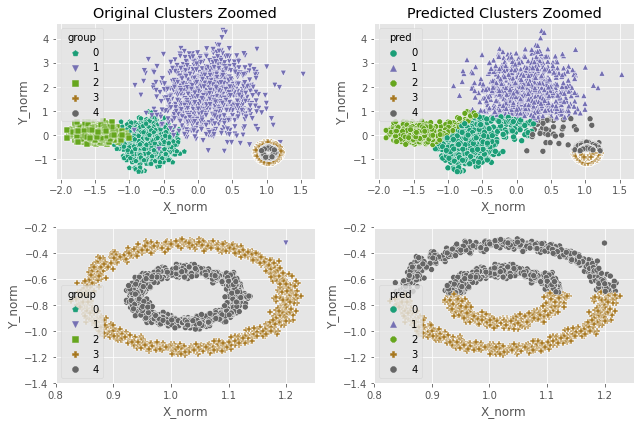

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(9, 6), tight_layout=True)
ax = ax.flatten()
ax[0] = sns.scatterplot(data=dftmp, x='X_norm', y='Y_norm', hue='group', palette=cmap, style='group', markers=['p', 'v', 's', 'P', 'o'], ax=ax[0])
ax[1] = sns.scatterplot(data=dftmp, x='X_norm', y='Y_norm', hue='pred', palette=cmap, style='pred', markers=['o', '^', '8', 'P', 'o'], ax=ax[1])
ax[2] = sns.scatterplot(data=dftmp, x='X_norm', y='Y_norm', hue='group', palette=cmap, style='group', markers=['p', 'v', 's', 'P', 'o'], ax=ax[2])
ax[2].set_xlim([0.8,1.25])
ax[2].set_ylim([-1.4,-0.2])
ax[3] = sns.scatterplot(data=dftmp, x='X_norm', y='Y_norm', hue='pred', palette=cmap, style='pred', markers=['o', '^', '8', 'P', 'o'], ax=ax[3])
ax[3].set_xlim([0.8,1.25])
ax[3].set_ylim([-1.4,-0.2])
ax[0].set_title('Original Clusters')
ax[1].set_title('Predicted Clusters')
ax[0].set_title('Original Clusters Zoomed')
ax[1].set_title('Predicted Clusters Zoomed')
plt.show()

Even though we set centroids kmeans didn't split the last cluster (with circles) properly. Unfortunately, we can do nothing about it with this clustering algorithm.

##### **Add more clusters** <br>
It will help to separate clusters that wasn't split before (in our case - the lower two clusters)

In [ ]:
temp_df = dfnorm.copy(deep=True)
numclusters = 5 * 2
km = KMeans(n_clusters=numclusters, random_state=42).fit(temp_df.loc[:, ['X_norm', 'Y_norm']])
km.cluster_centers_
temp_df['pred'] = km.labels_
clus_cols = [ii[1] for ii in list(mcd.XKCD_COLORS.items())[0:numclusters]]

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


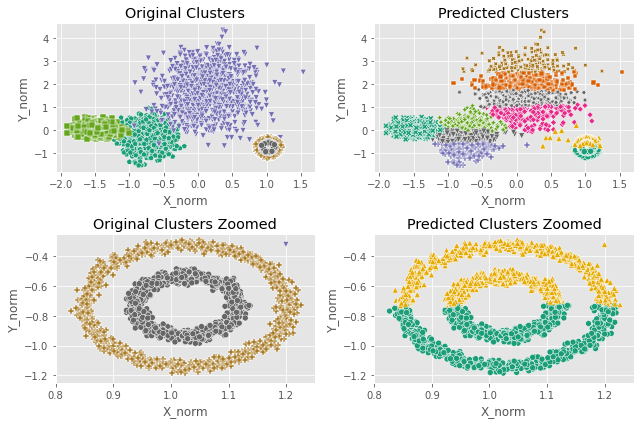

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(9, 6), tight_layout=True)
ax = ax.flatten()
ax[0] = sns.scatterplot(data=temp_df, x='X_norm', y='Y_norm', hue='group', palette=cmap, style='group', markers=['p', 'v', 's', 'P', 'o'], ax=ax[0])
ax[1] = sns.scatterplot(data=temp_df, x='X_norm', y='Y_norm', hue='pred', palette=cmap, style='pred', ax=ax[1])
ax[2] = sns.scatterplot(data=temp_df, x='X_norm', y='Y_norm', hue='group', palette=cmap, style='group', markers=['p', 'v', 's', 'P', 'o'], ax=ax[2])
ax[3] = sns.scatterplot(data=temp_df, x='X_norm', y='Y_norm', hue='pred', palette=cmap, style='pred', ax=ax[3])
ax[2].set_xlim([0.8,1.25])
ax[2].set_ylim([-1.25,-0.25])
ax[3].set_xlim([0.8,1.25])
ax[3].set_ylim([-1.25,-0.25])
ax[0].set_title('Original Clusters')
ax[1].set_title('Predicted Clusters')
ax[2].set_title('Original Clusters Zoomed')
ax[3].set_title('Predicted Clusters Zoomed')
ax[0].get_legend().remove()
ax[1].get_legend().remove()
ax[2].get_legend().remove()
ax[3].get_legend().remove()
plt.tight_layout()

Even though two clusters separated (the circles we added). Kmeans can't interpret the split between the circles properly. <br> Therefore, we have to use **DBSCAN** that can separate this cluster.

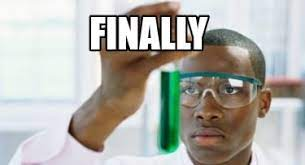

### DBSCAN

**Parameters:**


1.    **eps**: The maximum distance between two samples is the key parameter in DBSCAN that determines wether one sample is considered to be in the neighborhood of the other. This distance is not a maximum limit for the distances between points within a cluster. It is important to choose an appropriate value for this parameter based on the specific dataset and the distance function being used.
2.   **min_samples**: A point is considered to be a core point if it has a certain number of other samples (or a certain total weight) within its neighborhood, including itself. This is a criterion that is used in DBSCAN to determine which points are considered to be core points.


**The steps for the DBSCAN algorithm are:**

1. Choose a distance threshold (eps) and a minimum number of samples (min_samples) that defines a dense region. <br>
For each sample in the dataset, find all other samples that are within a distance of eps. If there are at least min_samples within this distance, the sample is a “core sample.” <br>
2. If a sample is a core sample, assign all samples within eps distance to the same cluster as the core sample. <br>
3. If a sample is not a core sample, but is within eps distance of a core sample, assign it to the same cluster as the core sample. <br>
4. Repeat the process for all remaining samples until all samples have been assigned to a cluster or labeled as noise (samples that do not belong to any cluster).

Pros:
1. We dont have to specify number of clusters (which we have to do with Kmeans)
2. Can handle noise
3. We can specify the distance metric w/o changing the function (which we have to do with Kmeans)
4. It can identify clusters of various shapes and define the number of clusters.

Cons:
1. We cant retrieve data about centroids (which we can do with Kmeans)

Let's observe the circles with DBSCAN

In [ ]:
temp_df = dfnorm.copy(deep=True)
circles_df = temp_df[(temp_df['group'] == 3 ) | ( temp_df['group'] == 4)]

Without any added parameters we didn't get acceptable clusters (we need 5, not 2). We'll change **eps** and **min_samples** to change it

In [ ]:
db = DBSCAN().fit(circles_df.loc[:, ['X_norm', 'Y_norm']])
labels = db.labels_
circles_df['pred'] = labels

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 0


<ipython-input-312-e55366de7c22>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  circles_df['pred'] = labels


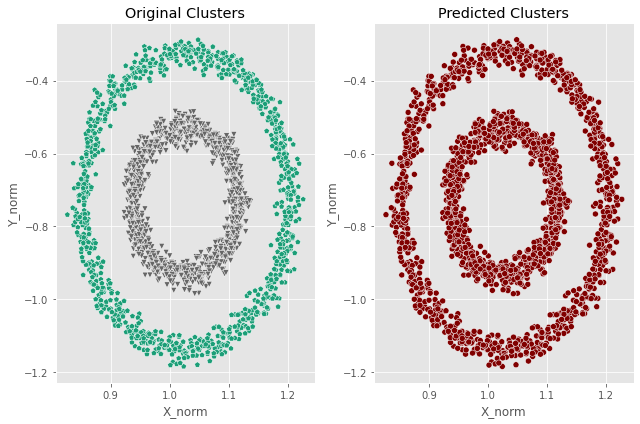

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(9, 6), tight_layout=True)
ax = ax.flatten()
ax[0] = sns.scatterplot(data=circles_df, x='X_norm', y='Y_norm', hue='group', palette=cmap, style='group', markers=['p', 'v'], ax=ax[0])
ax[1] = sns.scatterplot(data=circles_df, x='X_norm', y='Y_norm', hue='pred', palette=['maroon'], style='pred', ax=ax[1])

ax[0].set_title('Original Clusters')
ax[1].set_title('Predicted Clusters')

ax[0].get_legend().remove()
ax[1].get_legend().remove()

plt.show()

Without any parameters set two clusters weren't separated, let's try to set eps to less than 0.5 (to make area we check for neighbors of an object smaller)

In [ ]:
db = DBSCAN(eps=0.02).fit(circles_df.loc[:, ['X_norm', 'Y_norm']])
labels = db.labels_
circles_df['pred'] = labels

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 1


<ipython-input-314-b2f7c99dcdc1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  circles_df['pred'] = labels


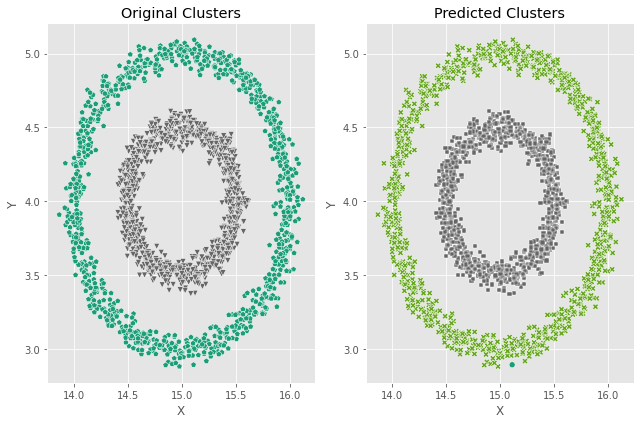

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(9, 6), tight_layout=True)
ax = ax.flatten()
ax[0] = sns.scatterplot(data=circles_df, x='X', y='Y', hue='group', palette=cmap, style='group', markers=['p', 'v'], ax=ax[0])
ax[1] = sns.scatterplot(data=circles_df, x='X', y='Y', hue='pred', palette=cmap, style='pred', ax=ax[1])

ax[0].set_title('Original Clusters')
ax[1].set_title('Predicted Clusters')

ax[0].get_legend().remove()
ax[1].get_legend().remove()

plt.tight_layout()

Yeah, great

##### Nope

In [ ]:
temp_df = dfnorm.copy(deep=True)

In [ ]:
db = DBSCAN().fit(temp_df.loc[:, ['X_norm', 'Y_norm']])
labels = db.labels_
temp_df['pred'] = labels

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 2


Without any added parameters we didn't get acceptable clusters (we need 5, not 2). We'll change **eps** and **min_samples** to change it

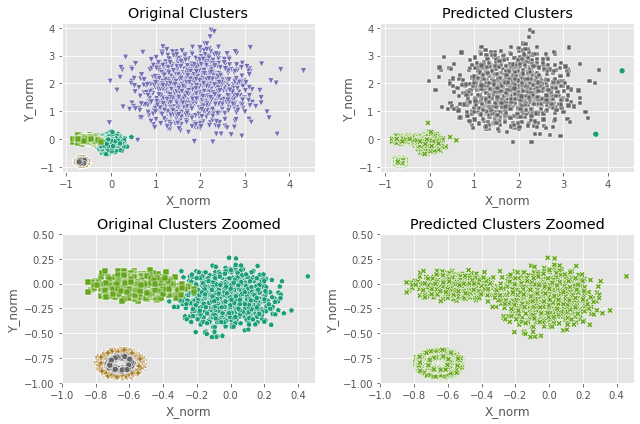

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(9, 6), tight_layout=True)
ax = ax.flatten()
ax[0] = sns.scatterplot(data=temp_df, x='X_norm', y='Y_norm', hue='group', palette=cmap, style='group', markers=['p', 'v', 's', 'P', 'o'], ax=ax[0])
ax[1] = sns.scatterplot(data=temp_df, x='X_norm', y='Y_norm', hue='pred', palette=cmap, style='pred', ax=ax[1])
ax[2] = sns.scatterplot(data=temp_df, x='X_norm', y='Y_norm', hue='group', palette=cmap, style='group', markers=['p', 'v', 's', 'P', 'o'], ax=ax[2])
ax[3] = sns.scatterplot(data=temp_df, x='X_norm', y='Y_norm', hue='pred', palette=cmap, style='pred', ax=ax[3])
ax[2].set_xlim([-1,0.5])
ax[2].set_ylim([-1,0.5])
ax[3].set_xlim([-1,0.5])
ax[3].set_ylim([-1,0.5])
ax[0].set_title('Original Clusters')
ax[1].set_title('Predicted Clusters')
ax[2].set_title('Original Clusters Zoomed')
ax[3].set_title('Predicted Clusters Zoomed')
ax[0].get_legend().remove()
ax[1].get_legend().remove()
ax[2].get_legend().remove()
ax[3].get_legend().remove()
plt.tight_layout()


Let's make increase the eps and lower number of clusters

In [ ]:
best_res

[[0.1, 18, 5, 923], [0.30000000000000004, 2, 5, 10]]

In [ ]:
import numpy as np
ans = []
best_res = []
eps_s = np.arange(0.1, 2, 0.1)
min_samples_s = np.arange(2, 19)

cnt = 1
for eps in eps_s:
    for min_samples in min_samples_s:
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(temp_df.loc[:, ['X_norm', 'Y_norm']])
        labels = db.labels_
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)
        ans.append([eps, min_samples, n_clusters_, n_noise_])
        if n_clusters_ == 5:
            best_res.append([eps, min_samples, n_clusters_, n_noise_])
        if cnt % 10 == 0:
            print('Iterated:', cnt)
        cnt+=1

Iterated: 10
Iterated: 20
Iterated: 30
Iterated: 40
Iterated: 50
Iterated: 60
Iterated: 70
Iterated: 80
Iterated: 90
Iterated: 100
Iterated: 110
Iterated: 120
Iterated: 130
Iterated: 140
Iterated: 150
Iterated: 160
Iterated: 170
Iterated: 180
Iterated: 190
Iterated: 200
Iterated: 210
Iterated: 220
Iterated: 230
Iterated: 240
Iterated: 250
Iterated: 260
Iterated: 270
Iterated: 280
Iterated: 290
Iterated: 300
Iterated: 310
Iterated: 320


In [ ]:
import numpy as np
ans = []
best_res = []
eps_s = np.arange(0.1, 2, 0.1)
min_samples_s = np.arange(2, 19)

cnt = 1
for eps in eps_s:
    for min_samples in min_samples_s:
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(temp_df.loc[:, ['X_norm', 'Y_norm']])
        labels = db.labels_
        temp_df['pred'] = labels
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)
        ans.append([eps, min_samples, n_clusters_, n_noise_])

        circles = len(set(temp_df[temp_df['group'] == (3 or 4)]['pred']))
        if circles == 2:
        # if n_clusters_ == 5:
            best_res.append([eps, min_samples, n_clusters_, n_noise_])
        if cnt % 10 == 0:
            print('Iterated:', cnt)
        cnt+=1

Iterated: 10
Iterated: 20
Iterated: 30
Iterated: 40
Iterated: 50
Iterated: 60
Iterated: 70
Iterated: 80
Iterated: 90
Iterated: 100
Iterated: 110
Iterated: 120
Iterated: 130
Iterated: 140
Iterated: 150
Iterated: 160
Iterated: 170
Iterated: 180
Iterated: 190
Iterated: 200
Iterated: 210
Iterated: 220
Iterated: 230
Iterated: 240
Iterated: 250
Iterated: 260
Iterated: 270
Iterated: 280
Iterated: 290
Iterated: 300
Iterated: 310
Iterated: 320


In [ ]:
best_res

[]

In [ ]:
db = DBSCAN(eps=0.4, min_samples=6).fit(temp_df.loc[:, ['X_norm', 'Y_norm']])
labels = db.labels_
temp_df['pred'] = labels

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 8


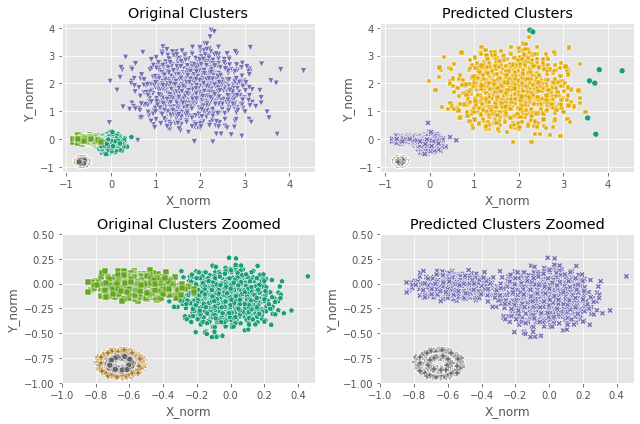

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(9, 6), tight_layout=True)
ax = ax.flatten()
ax[0] = sns.scatterplot(data=temp_df, x='X_norm', y='Y_norm', hue='group', palette=cmap, style='group', markers=['p', 'v', 's', 'P', 'o'], ax=ax[0])
ax[1] = sns.scatterplot(data=temp_df, x='X_norm', y='Y_norm', hue='pred', palette=cmap, style='pred', ax=ax[1])
ax[2] = sns.scatterplot(data=temp_df, x='X_norm', y='Y_norm', hue='group', palette=cmap, style='group', markers=['p', 'v', 's', 'P', 'o'], ax=ax[2])
ax[3] = sns.scatterplot(data=temp_df, x='X_norm', y='Y_norm', hue='pred', palette=cmap, style='pred', ax=ax[3])
ax[2].set_xlim([-1,0.5])
ax[2].set_ylim([-1,0.5])
ax[3].set_xlim([-1,0.5])
ax[3].set_ylim([-1,0.5])
ax[0].set_title('Original Clusters')
ax[1].set_title('Predicted Clusters')
ax[2].set_title('Original Clusters Zoomed')
ax[3].set_title('Predicted Clusters Zoomed')
ax[0].get_legend().remove()
ax[1].get_legend().remove()
ax[2].get_legend().remove()
ax[3].get_legend().remove()
plt.tight_layout()